In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
# directory training dengan gambar ali
train_ali_dir = os.path.join('/content/drive/MyDrive/Dataset/PA/training/Ali')
# directory training dengan gambar fikri
train_fikri_dir = os.path.join('/content/drive/MyDrive/Dataset/PA/training/Fikri')
# directory training dengan gambar irawan
train_irawan_dir = os.path.join('/content/drive/MyDrive/Dataset/PA/training/Irawan')
# directory training dengan gambar irsyad
train_irsyad_dir = os.path.join('/content/drive/MyDrive/Dataset/PA/training/Irsyad')
# directory training dengan gambar salsa
train_salsa_dir = os.path.join('/content/drive/MyDrive/Dataset/PA/training/Salsa')

# directory validation dengan gambar ali
valid_ali_dir = os.path.join('/content/drive/MyDrive/Dataset/PA/validation/Ali')
# directory validation dengan gambar fikri
valid_fikri_dir = os.path.join('/content/drive/MyDrive/Dataset/PA/validation/Fikri')
# directory validation dengan gambar irawan
valid_irawan_dir = os.path.join('/content/drive/MyDrive/Dataset/PA/validation/Irawan')
# directory validation dengan gambar irsyad
valid_irsyad_dir = os.path.join('/content/drive/MyDrive/Dataset/PA/validation/Irsyad')
# directory validation dengan gambar salsa
valid_salsa_dir = os.path.join('/content/drive/MyDrive/Dataset/PA/validation/Salsa')

In [ ]:
train_ali_names = os.listdir(train_ali_dir)
print(train_ali_names[:5])
train_fikri_names = os.listdir(train_fikri_dir)
print(train_fikri_names[:5])
train_irawan_names = os.listdir(train_irawan_dir)
print(train_irawan_names[:5])
train_irsyad_names = os.listdir(train_irsyad_dir)
print(train_irsyad_names[:5])
train_salsa_names = os.listdir(train_salsa_dir)
print(train_salsa_names[:5])

valid_ali_names = os.listdir(valid_ali_dir)
print(valid_ali_names)
valid_fikri_names = os.listdir(valid_fikri_dir)
print(valid_fikri_names)
valid_irawan_names = os.listdir(valid_irawan_dir)
print(valid_irawan_names)
valid_irsyad_names = os.listdir(valid_irsyad_dir)
print(valid_irsyad_names)
valid_salsa_names = os.listdir(valid_salsa_dir)
print(valid_salsa_names)

['A50.jpg', 'A47.jpg', 'A49.jpg', 'A46.jpg', 'A48.jpg']
['F17.jpg', 'F14.jpg', 'F16.jpg', 'F9.jpg', 'F8.jpg']
['I50.jpg', 'I7.jpg', 'I35.jpg', 'I6.jpg', 'I34.jpg']
['Ir16.jpeg', 'Ir15.jpeg', 'Ir17.jpeg', 'Ir20.jpeg', 'Ir18.jpeg']
['S48.jpg', 'S47.jpg', 'S49.jpg', 'S50.jpg', 'S46.jpg']
['A44.jpg', 'A33.jpg', 'A38.jpg', 'A22.jpg', 'A26.jpg', 'A20.jpg', 'A11.jpg', 'A6.jpg', 'A10.jpg']
['F15.jpg', 'F13.jpg', 'F5.jpg', 'F50.jpg', 'F49.jpg', 'F46.jpg', 'F41.jpg', 'F28.jpg', 'F4.jpg']
['I49.jpg', 'I33.jpg', 'I8.jpg', 'I27.jpg', 'I45.jpg', 'I20.jpg', 'I36.jpg', 'I12.jpg', 'I41.jpg', 'I10.jpg']
['Ir14.jpeg', 'Ir13.jpeg', 'Ir22.jpeg', 'Ir26.jpeg', 'Ir32.jpeg', 'Ir35.jpeg', 'Ir37.jpeg', 'Ir39.jpeg', 'Ir1.jpg', 'Ir12.jpg']
['S44.jpg', 'S39.jpg', 'S36.jpg', 'S31.jpg', 'S24.jpg', 'S21.jpg', 'S18.jpg', 'S13.jpg', 'S11.jpg', 'S6.jpg']


In [ ]:
print('Total training gambar ali\t: ', len(os.listdir(train_ali_dir)))
print('Total training gambar fikri\t: ', len(os.listdir(train_fikri_dir)))
print('Total training gambar irawan\t: ', len(os.listdir(train_irawan_dir)))
print('Total training gambar irsyad\t: ', len(os.listdir(train_irsyad_dir)))
print('Total training gambar salsa\t: ', len(os.listdir(train_salsa_dir)))
print('Total validation gambar ali\t: ', len(os.listdir(valid_ali_dir)))
print('Total validation gambar fikri\t: ', len(os.listdir(valid_fikri_dir)))
print('Total validation gambar irawan\t: ', len(os.listdir(valid_irawan_dir)))
print('Total validation gambar irsyad\t: ', len(os.listdir(valid_irsyad_dir)))
print('Total validation gambar salsa\t: ', len(os.listdir(valid_salsa_dir)))

Total training gambar ali	:  39
Total training gambar fikri	:  39
Total training gambar irawan	:  38
Total training gambar irsyad	:  38
Total training gambar salsa	:  38
Total validation gambar ali	:  9
Total validation gambar fikri	:  9
Total validation gambar irawan	:  10
Total validation gambar irsyad	:  10
Total validation gambar salsa	:  10


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/PA/training',
                                                 target_size = (150, 150),
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

Found 192 images belonging to 5 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/PA/validation',
                                            target_size = (150,150),
                                            batch_size = 5,
                                            class_mode = 'categorical')

Found 48 images belonging to 5 classes.


In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

cnn.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
history = cnn.fit(x=training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
20/20 [==============================] - 26s 1s/step - loss: 1.6595 - accuracy: 0.2917 - val_loss: 1.1069 - val_accuracy: 0.6875
Epoch 2/20
20/20 [==============================] - 25s 1s/step - loss: 0.8594 - accuracy: 0.7135 - val_loss: 0.4154 - val_accuracy: 0.8542
Epoch 3/20
20/20 [==============================] - 25s 1s/step - loss: 0.6680 - accuracy: 0.7812 - val_loss: 0.2929 - val_accuracy: 0.8750
Epoch 4/20
20/20 [==============================] - 25s 1s/step - loss: 0.3456 - accuracy: 0.8958 - val_loss: 0.1585 - val_accuracy: 0.9375
Epoch 5/20
20/20 [==============================] - 25s 1s/step - loss: 0.1903 - accuracy: 0.9219 - val_loss: 0.3085 - val_accuracy: 0.9167
Epoch 6/20
20/20 [==============================] - 24s 1s/step - loss: 0.2441 - accuracy: 0.9115 - val_loss: 0.1660 - val_accuracy: 0.9167
Epoch 7/20
20/20 [==============================] - 25s 1s/step - loss: 0.3629 - accuracy: 0.8802 - val_loss: 0.2615 - val_accuracy: 0.9375
Epoch 8/20
20/20 [==

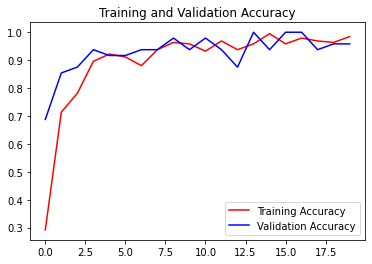

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

<Figure size 432x288 with 0 Axes>

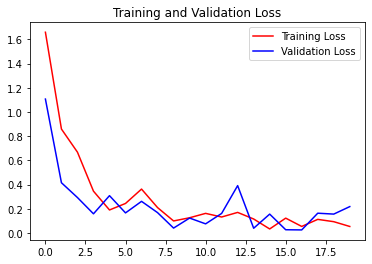

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

In [ ]:
cnn.save('/content/drive/MyDrive/Dataset/face_classification.h5')

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/content/drive/MyDrive/Dataset/face_classification.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
hist = model.fit(x = training_set,
                 epochs = 5,
                 validation_data = test_set)

Epoch 1/5
20/20 [==============================] - 26s 1s/step - loss: 0.0623 - accuracy: 0.9844 - val_loss: 0.2881 - val_accuracy: 0.9167
Epoch 2/5
20/20 [==============================] - 25s 1s/step - loss: 0.1926 - accuracy: 0.9583 - val_loss: 0.5045 - val_accuracy: 0.8333
Epoch 3/5
20/20 [==============================] - 25s 1s/step - loss: 0.2176 - accuracy: 0.9323 - val_loss: 0.2318 - val_accuracy: 0.8958
Epoch 4/5
20/20 [==============================] - 25s 1s/step - loss: 0.0717 - accuracy: 0.9688 - val_loss: 0.0470 - val_accuracy: 0.9792
Epoch 5/5
20/20 [==============================] - 25s 1s/step - loss: 0.0331 - accuracy: 0.9896 - val_loss: 0.0143 - val_accuracy: 1.0000


In [ ]:
model.save('/content/drive/MyDrive/Dataset/face_model.h5')

In [ ]:
model1 = load_model('/content/drive/MyDrive/Dataset/face_model.h5')
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
hist = model1.fit(x = training_set,
                 epochs = 5,
                 validation_data = test_set)

Epoch 1/5
20/20 [==============================] - 27s 1s/step - loss: 0.0375 - accuracy: 0.9792 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 2/5
20/20 [==============================] - 25s 1s/step - loss: 0.0270 - accuracy: 0.9896 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 3/5
20/20 [==============================] - 26s 1s/step - loss: 0.0212 - accuracy: 0.9896 - val_loss: 0.0952 - val_accuracy: 0.9583
Epoch 4/5
20/20 [==============================] - 25s 1s/step - loss: 0.0250 - accuracy: 0.9896 - val_loss: 0.0246 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 25s 1s/step - loss: 0.0166 - accuracy: 0.9896 - val_loss: 0.0543 - val_accuracy: 0.9792


In [ ]:
model1.save('/content/drive/MyDrive/Dataset/face_model_madel.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Dataset/face_model_madel.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 128)     